In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data file
df = pd.read_csv("train.csv")
# Replace "?" with NaN
df.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
df["Age"] = pd.to_numeric(df["Age"])
# df2 = df[:,:]
df2 = df.copy()
df2.head(5)

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80,0,-


In [3]:
df.describe()

,Key,Age,Debt,YearsEmployed,CreditScore,Income
count,590.000000,578.000000,590.000000,590.000000,590.000000,590.000000
mean,295.500000,31.258270,4.609390,2.088534,2.045763,918.706780
std,170.462606,12.014247,4.849569,3.198681,3.702375,5025.415369
min,1.000000,13.750000,0.000000,0.000000,0.000000,0.000000
25%,148.250000,22.500000,1.000000,0.165000,0.000000,0.000000
50%,295.500000,28.125000,2.710000,1.000000,0.000000,4.000000
75%,442.750000,37.500000,7.000000,2.500000,2.000000,363.000000
max,590.000000,80.250000,26.335000,20.000000,20.000000,100000.000000


In [4]:
df.isnull().sum()

Key                0
Male              11
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [5]:
df.fillna(df.mean(), inplace=True)
df.head(5)

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80,0,-


In [6]:
df.isnull().sum()

Key                0
Male              11
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Key               590 non-null int64
Male              579 non-null object
Age               590 non-null float64
Debt              590 non-null float64
Married           584 non-null object
BankCustomer      584 non-null object
EducationLevel    581 non-null object
Ethnicity         581 non-null object
YearsEmployed     590 non-null float64
PriorDefault      590 non-null object
Employed          590 non-null object
CreditScore       590 non-null int64
DriversLicense    590 non-null object
Citizen           590 non-null object
ZipCode           577 non-null object
Income            590 non-null int64
Approved          590 non-null object
dtypes: float64(3), int64(3), object(11)
memory usage: 78.4+ KB


In [8]:
df.drop(['Key', 'DriversLicense', 'ZipCode'], axis=1,inplace=True)

In [9]:
df.head(5)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,s,0,-
1,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,g,122,-
2,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,g,1004,-
3,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,g,0,-
4,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,s,0,-


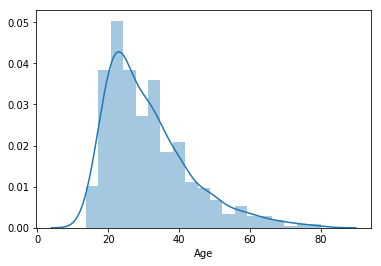

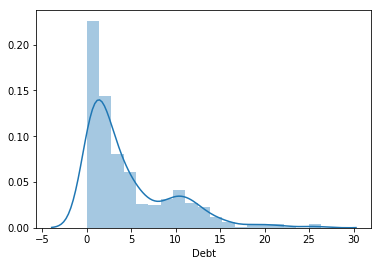

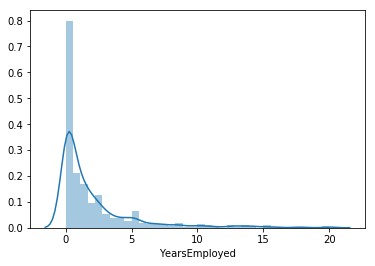

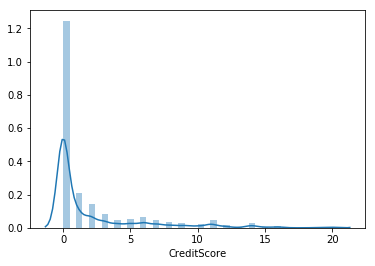

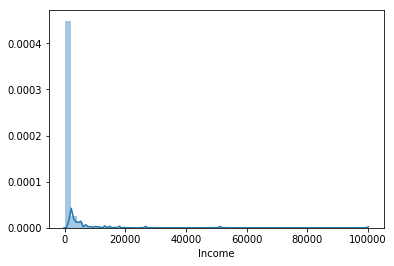

In [10]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(df['Age'])
plotDistPlot(df['Debt'])
plotDistPlot(df['YearsEmployed'])
plotDistPlot(df['CreditScore'])
plotDistPlot(df['Income'])

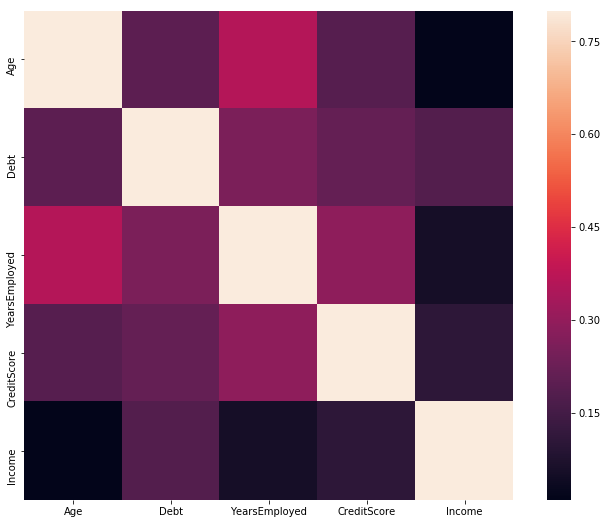

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

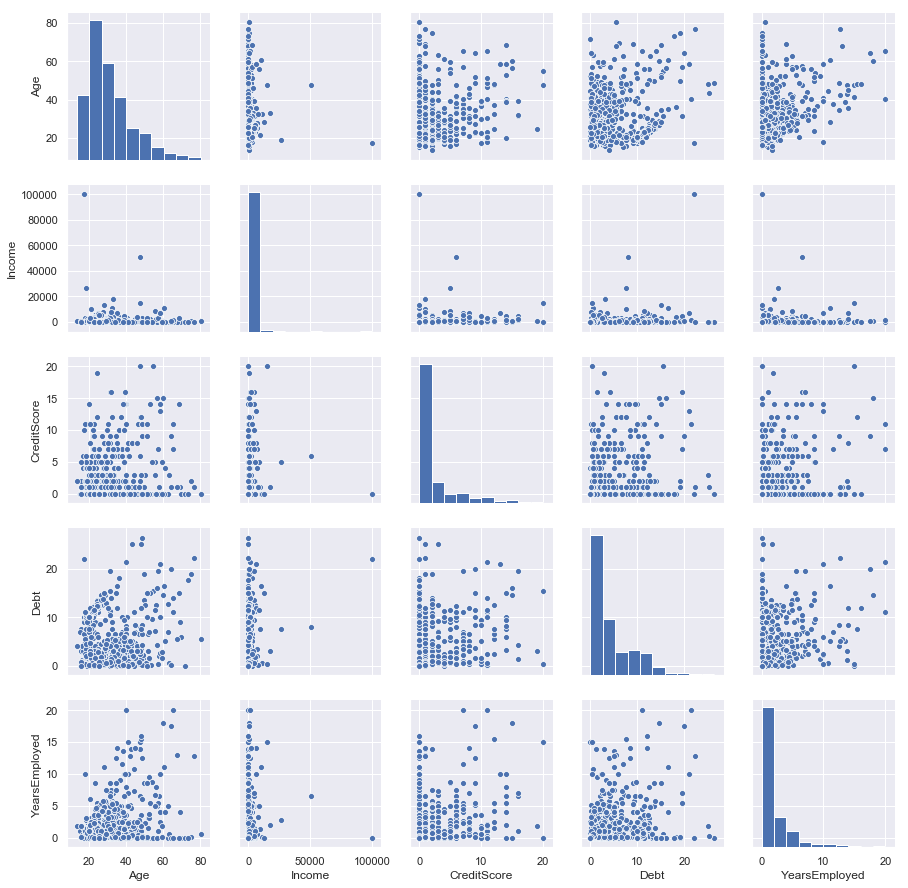

In [12]:
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(df[cols], size = 2.5)
plt.show();

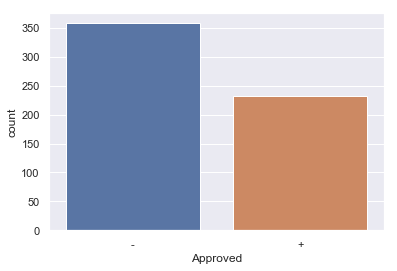

In [13]:
sns.countplot(data = df, x = 'Approved')

In [14]:
print("shape of the data:", df.shape)

shape of the data: (590, 14)


In [15]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(df)

In [16]:
df.head(5)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,b,40.83,3.500,u,g,i,bb,0.500,f,f,0,s,0,-
1,b,32.25,1.500,u,g,c,v,0.250,f,f,0,g,122,-
2,b,28.17,0.585,u,g,aa,v,0.040,f,f,0,g,1004,-
3,b,29.75,0.665,u,g,w,v,0.250,f,f,0,g,0,-
4,b,26.50,2.710,y,p,c,v,0.085,f,f,0,s,0,-


In [17]:
df.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
Approved          0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in df:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [19]:
df.head(5)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,40.83,3.500,1,0,6,0,0.500,0,0,0,2,0,1
1,1,32.25,1.500,1,0,1,7,0.250,0,0,0,0,122,1
2,1,28.17,0.585,1,0,0,7,0.040,0,0,0,0,1004,1
3,1,29.75,0.665,1,0,12,7,0.250,0,0,0,0,0,1
4,1,26.50,2.710,2,2,1,7,0.085,0,0,0,2,0,1


In [20]:
from sklearn.model_selection import train_test_split
y = df['Approved'].values
X= df.drop(['Approved'], axis=1)

y = df['Approved'].values
X= df.drop(['Approved'], axis=1)
# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

rescaledX = scaler.transform(X)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=50)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.864406779661017


array([[37, 12],
       [ 4, 65]], dtype=int64)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(rescaledX_train, y_train)
y_pred = neigh.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", neigh.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.864406779661017


array([[42,  7],
       [ 9, 60]], dtype=int64)

In [23]:
from sklearn.metrics import f1_score
print("F1 Score is ")
f1_score(Y_test, y_pred, average='binary') 

F1 Score is 


0.8767123287671235

Feature ranking:
1. feature 8 (0.245927)
2. feature 12 (0.114604)
3. feature 10 (0.109601)
4. feature 7 (0.109307)
5. feature 2 (0.104092)
6. feature 1 (0.091848)
7. feature 9 (0.067847)
8. feature 5 (0.066210)
9. feature 6 (0.027113)
10. feature 3 (0.018594)
11. feature 0 (0.016235)
12. feature 4 (0.015869)
13. feature 11 (0.012753)


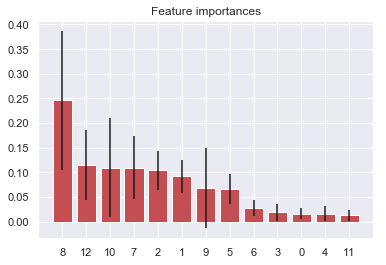

In [24]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

According to the Random Forest Classifier, PriorDefault is the most important feature, followed by Credit Score and Employment status.

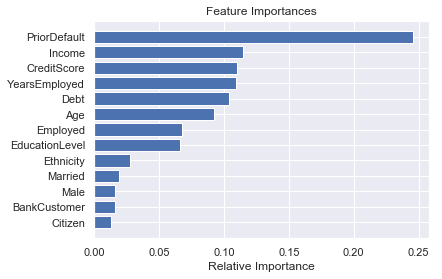

In [25]:
# copy of CC_data is in CC_data2
df2 = df2.drop(['Approved'], axis=1)

features = df.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [26]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Using the trained model to predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, Y_test))

# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Logistic regression classifier has accuracy of:  0.847457627118644


array([[43,  6],
       [12, 57]], dtype=int64)

In [28]:
from sklearn.metrics import f1_score
print("F1 Score is ")
f1_score(Y_test, y_pred, average='binary') 


F1 Score is 


0.8636363636363636

In [29]:
y_probs = logreg.predict_proba(rescaledX)
y_class = logreg.predict(rescaledX)

In [30]:
y_probs = np.delete(y_probs, 0, 1)

In [31]:
df["Probs"] = np.ravel(y_probs).tolist()
df["Class"] = np.ravel(y_class).tolist()

In [32]:
df.to_csv("CC_data.csv", index = False)

# Pre-processing of data where prediction required

In [33]:
dff = pd.read_csv("test.csv")
# Replace "?" with NaN
dff.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
dff["Age"] = pd.to_numeric(dff["Age"])
# df2 = df[:,:]
dff2 = dff.copy()
dff2.head(5)

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,b,31.83,0.04,y,p,m,v,0.040,f,f,0,f,g,0,0
1,2,a,21.75,11.75,u,g,c,v,0.250,f,f,0,t,g,180,0
2,3,a,17.92,0.54,u,g,c,v,1.750,f,t,1,t,g,80,5
3,4,b,30.33,0.50,u,g,d,h,0.085,f,f,0,t,s,252,0
4,5,b,51.83,2.04,y,p,ff,ff,1.500,f,f,0,f,g,120,1


In [34]:
dff.isnull().sum()

Key               0
Male              1
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
dtype: int64

In [35]:
dff.fillna(dff.mean(), inplace=True)
dff.head(5)

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,b,31.83,0.04,y,p,m,v,0.040,f,f,0,f,g,0,0
1,2,a,21.75,11.75,u,g,c,v,0.250,f,f,0,t,g,180,0
2,3,a,17.92,0.54,u,g,c,v,1.750,f,t,1,t,g,80,5
3,4,b,30.33,0.50,u,g,d,h,0.085,f,f,0,t,s,252,0
4,5,b,51.83,2.04,y,p,ff,ff,1.500,f,f,0,f,g,120,1


In [36]:
dff.drop(['Key', 'DriversLicense', 'ZipCode'], axis=1,inplace=True)

In [37]:
imputeWithMode(dff)

In [38]:
dff.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in dff:
    if dff[col].dtypes=='object':
        dff[col]=le.fit_transform(dff[col])

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_dff = scaler.fit_transform(dff)

rescaledX = scaler.transform(X)

Prediction of " ytest"

In [41]:
y_predd = rf.predict(rescaledX_dff)

In [42]:
y_predd

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
y_preddd = logreg.predict(rescaledX_dff)

In [44]:
y_preddd

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
y_predddd = neigh.predict(rescaledX_dff)

In [60]:
y_predddd

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])